In [123]:
# Water Quality Prediction – EE7209
#Problem Type:** Supervised Learning (Classification)  
#Target Variable:** Potability (1 = Safe, 0 = Unsafe)  
#Algorithms Used:** Logistic Regression, Decision Tree  
#Evaluation Metrics:** Accuracy, Recall, F1-score

In [124]:
import pandas as pd
import numpy as np

In [125]:
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_validate

from sklearn.pipeline import Pipeline #do automatically all imputer,scaler and model.
from sklearn.impute import SimpleImputer #handle missing value (mean,median,most_frequent)
from sklearn.preprocessing import StandardScaler #check range(mean is zero)

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score, recall_score, f1_score, confusion_matrix, classification_report

In [126]:
df = pd.read_csv("water_potability.csv")
#df = df.dropna()
print("\nHEAD:")
print(df.head())



HEAD:
         ph    Hardness        Solids  Chloramines     Sulfate  Conductivity  \
0       NaN  204.890455  20791.318981     7.300212  368.516441    564.308654   
1  3.716080  129.422921  18630.057858     6.635246         NaN    592.885359   
2  8.099124  224.236259  19909.541732     9.275884         NaN    418.606213   
3  8.316766  214.373394  22018.417441     8.059332  356.886136    363.266516   
4  9.092223  181.101509  17978.986339     6.546600  310.135738    398.410813   

   Organic_carbon  Trihalomethanes  Turbidity  Potability  
0       10.379783        86.990970   2.963135           0  
1       15.180013        56.329076   4.500656           0  
2       16.868637        66.420093   3.055934           0  
3       18.436524       100.341674   4.628771           0  
4       11.558279        31.997993   4.075075           0  


In [127]:
print("SHAPE:\n", df.shape)
print("\nCOLUMNS:\n", df.columns)

print("\nDTYPES:")
print(df.dtypes)

print("\nMISSING VALUES:")
print(df.isna().sum())

print("\nDESCRIBE:")
print(df.describe())

print("\nINFO:")
df.info()

print("\nSAMPLE:")
print(df.sample(10))

SHAPE:
 (3276, 10)

COLUMNS:
 Index(['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity', 'Potability'],
      dtype='object')

DTYPES:
ph                 float64
Hardness           float64
Solids             float64
Chloramines        float64
Sulfate            float64
Conductivity       float64
Organic_carbon     float64
Trihalomethanes    float64
Turbidity          float64
Potability           int64
dtype: object

MISSING VALUES:
ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

DESCRIBE:
                ph     Hardness        Solids  Chloramines      Sulfate  \
count  2785.000000  3276.000000   3276.000000  3276.000000  2495.000000   
mean      7.080795   196.369496  22014.092526     7.122277   333.775777   
std       

In [128]:
x = df.drop(columns=["Potability"])
y = df["Potability"]

#x.head()
#y.head()

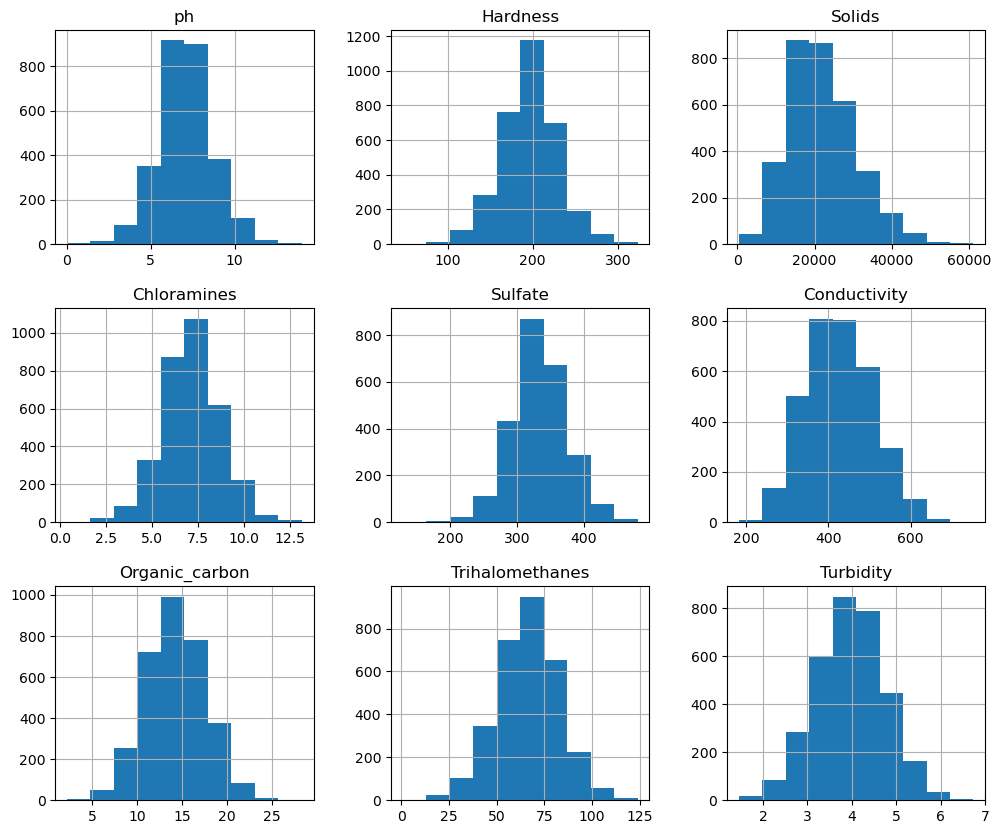

In [129]:
import matplotlib.pyplot as plt

x.hist(figsize=(12, 10)) #(width, height)
plt.show()


In [131]:
X_train, X_test, y_train, y_test = train_test_split(
    x, y, test_size=0.1, stratify=y, random_state=42
)

#random_state → same split every time
#stratify → same class balance

#X_train.head()
#y_test.head()

In [132]:
lr_pipe = Pipeline([ #apply preprocessing and the model as ONE safe, ordered unit without data leakage.
    ("imputer", SimpleImputer(strategy="mean")), #fill missing
    ("scaler", StandardScaler()), #scale data
    ("model", LogisticRegression(max_iter=1500,solver="liblinear", class_weight="balanced", random_state=42))
]) 
# One iteration = one update of all weights and bias
# class_weight - Both classes are equally important, even if one appears less(improve Accuracy, Recall (minority), F1-score,Real usefulness)

lr_pipe.fit(X_train, y_train)
y_pred_lr = lr_pipe.predict(X_test)


In [133]:
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
#print("Recall:", recall_score(y_test, y_pred_lr))
#print("F1-score:", f1_score(y_test, y_pred_lr))
#print(confusion_matrix(y_test, y_pred_lr))
#print(classification_report(y_test, y_pred_lr))


Accuracy: 0.5426829268292683


In [134]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scoring = {"accuracy": "accuracy", "recall": "recall", "f1": "f1"}

cross_validate(lr_pipe, x, y, cv=cv, scoring=scoring)
cross_validate(dt_pipe, x, y, cv=cv, scoring=scoring)


{'fit_time': array([0.05578828, 0.06199145, 0.06268096, 0.05595589, 0.05713439]),
 'score_time': array([0.00680518, 0.00704527, 0.00742555, 0.0102427 , 0.00802612]),
 'test_accuracy': array([0.60060976, 0.56641221, 0.57099237, 0.60152672, 0.57099237]),
 'test_recall': array([0.5       , 0.43529412, 0.49411765, 0.44140625, 0.43359375]),
 'test_f1': array([0.49420849, 0.43873518, 0.4727955 , 0.46406571, 0.44135189])}

In [135]:
dt_pipe = Pipeline([
    ("imputer", SimpleImputer(strategy="median", add_indicator=True)),  # fill missing + add missing flags
    ("model", DecisionTreeClassifier(
        class_weight="balanced",   # handle imbalance
        random_state=42,
        max_depth=None             # you can tune this
    ))
])

# Train
dt_pipe.fit(X_train, y_train)

# Predict
y_pred_dt = dt_pipe.predict(X_test)

In [136]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

print("Accuracy:", accuracy_score(y_test, y_pred_dt))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_dt))
print("\nClassification Report:\n", classification_report(y_test, y_pred_dt))


Accuracy: 0.6219512195121951

Confusion Matrix:
 [[140  60]
 [ 64  64]]

Classification Report:
               precision    recall  f1-score   support

           0       0.69      0.70      0.69       200
           1       0.52      0.50      0.51       128

    accuracy                           0.62       328
   macro avg       0.60      0.60      0.60       328
weighted avg       0.62      0.62      0.62       328



In [149]:
| NaN % in a feature | Action                    |
| ------------------ | ------------------------- |
| < 5%               | Simple imputation         |
| 5% – 30%           | Smart imputation          |
| 30% – 60%          | Consider dropping feature |
| > 60%              | Drop feature ❌           |


SyntaxError: invalid character '–' (U+2013) (2374472443.py, line 4)

In [70]:
print("========================================================================================================================================================")

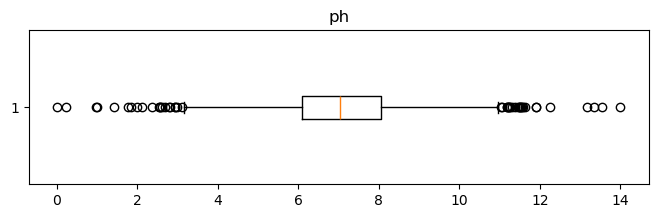

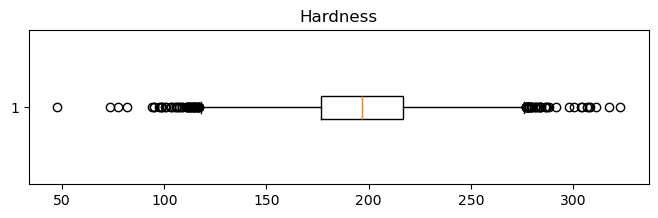

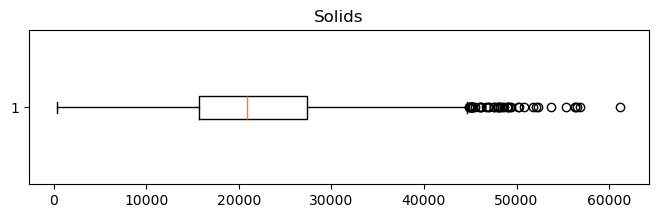

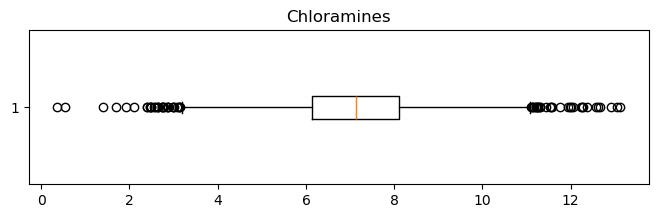

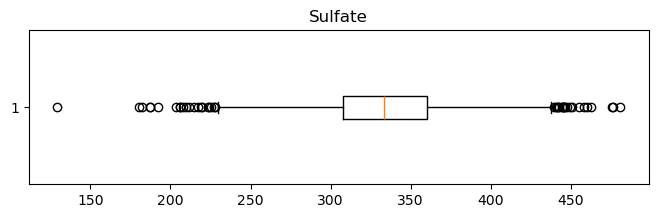

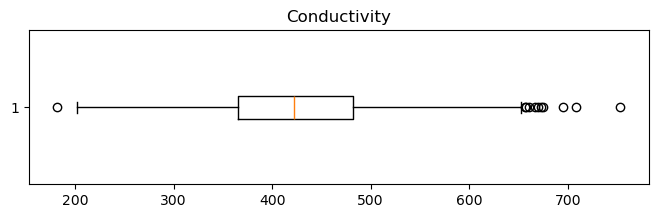

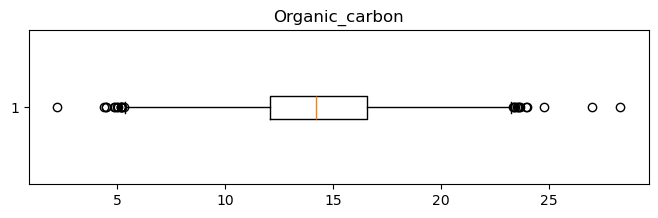

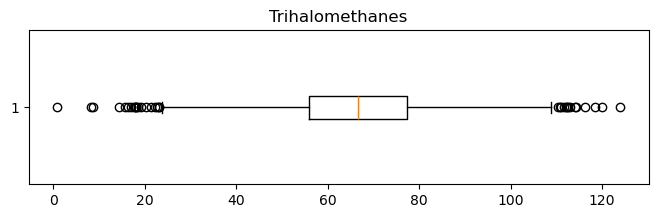

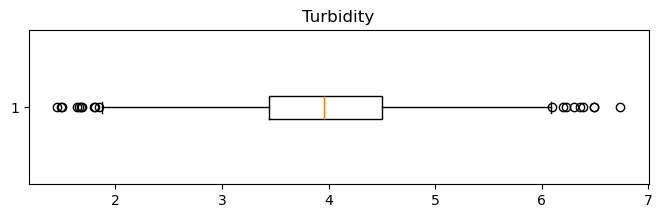

In [150]:
for col in x.columns:
    plt.figure(figsize=(8, 2))
    plt.boxplot(x[col].dropna(), vert=False)
    plt.title(col)
    plt.show()


In [162]:
import pandas as pd

factor = 3
x_std = x.copy()

for col in x_std.columns:
    upper = x_std[col].mean() + factor * x_std[col].std()
    lower = x_std[col].mean() - factor * x_std[col].std()
    x_std = x_std[(x_std[col] < upper) & (x_std[col] > lower)]

print("Original shape:", x.shape)
print("After outlier removal:", x_std.shape)


Original shape: (3276, 9)
After outlier removal: (1932, 9)


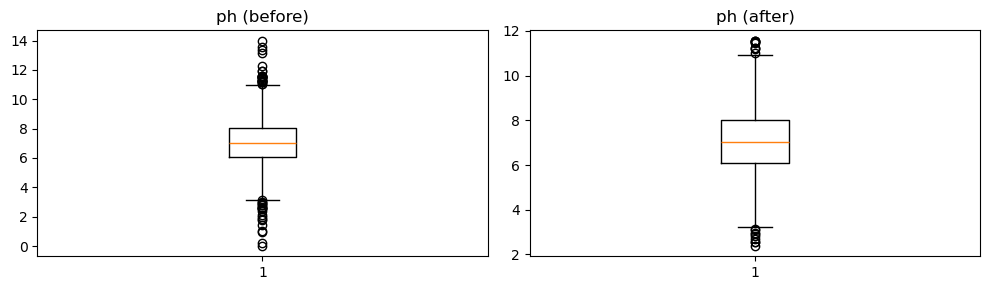

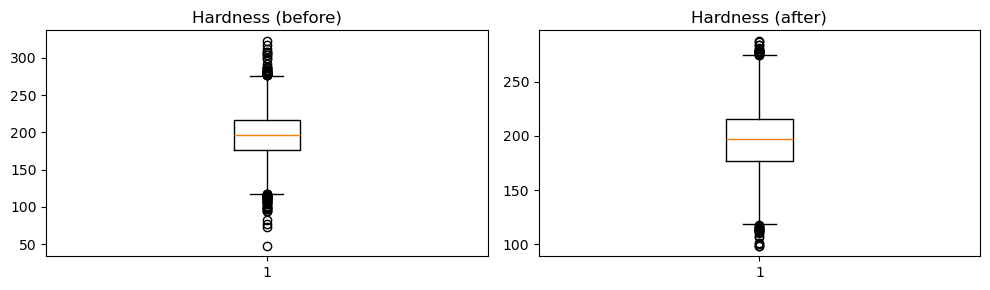

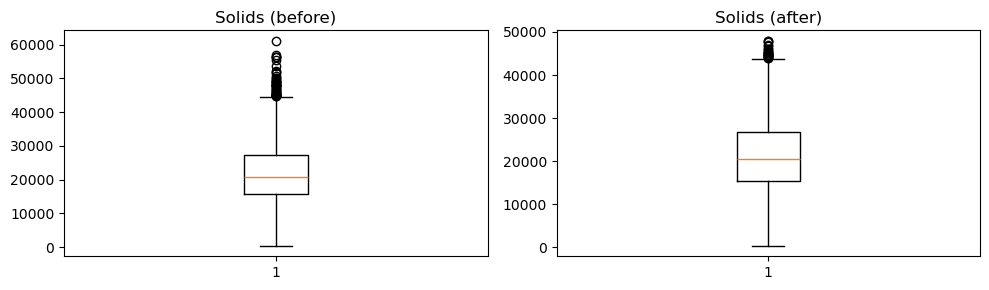

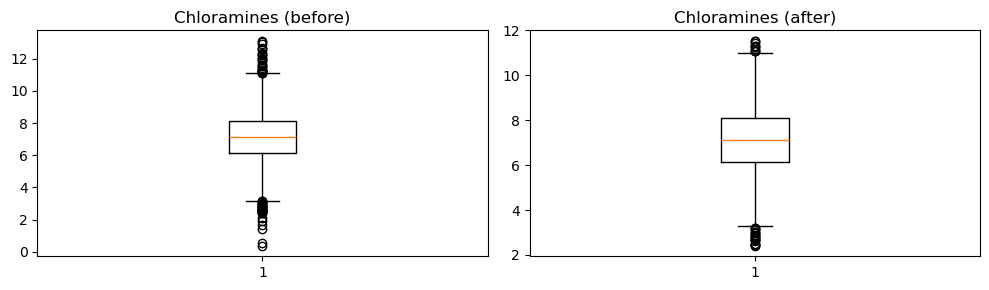

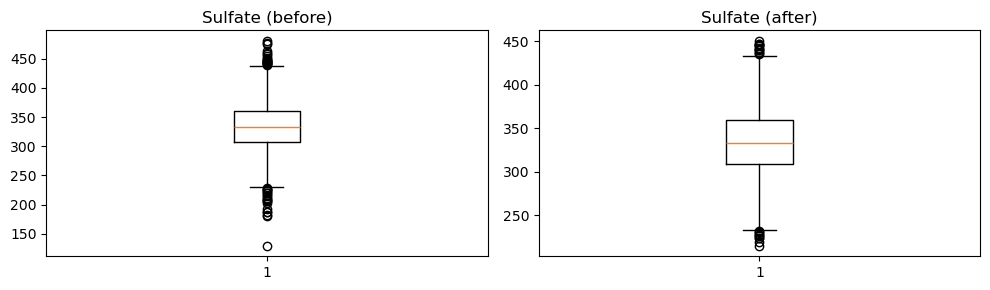

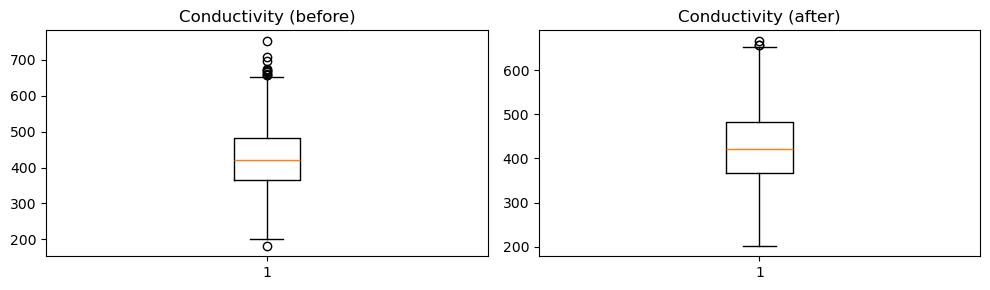

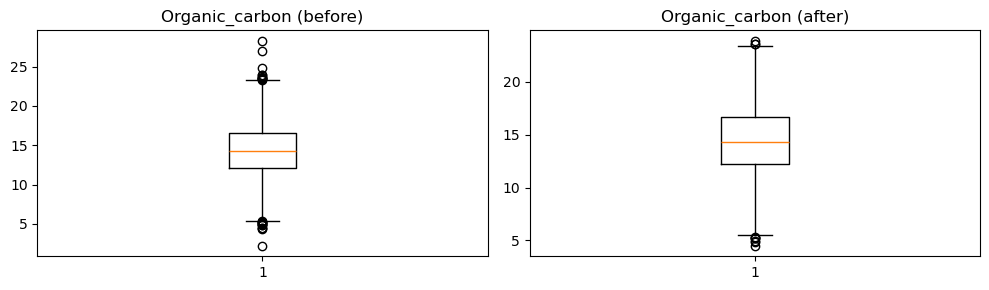

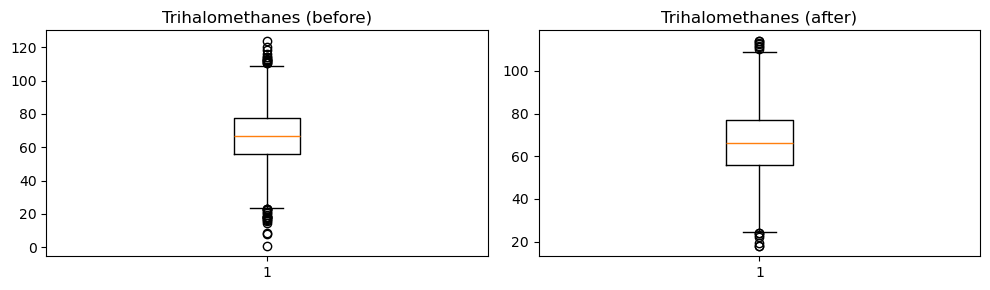

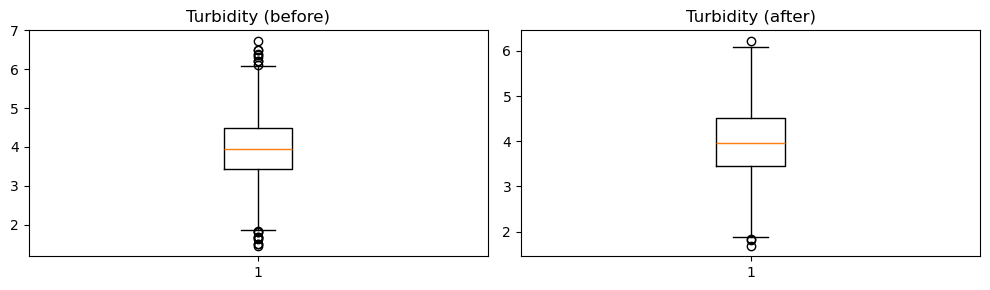

In [164]:
for col in x.columns:
    plt.figure(figsize=(10, 3))

    plt.subplot(1, 2, 1)
    plt.boxplot(x[col].dropna())
    plt.title(f"{col} (before)")

    plt.subplot(1, 2, 2)
    plt.boxplot(x_std[col].dropna())
    plt.title(f"{col} (after)")

    plt.tight_layout()
    plt.show()


In [167]:
X = x_std.copy()
y = y.loc[X.index]   # important: align y with remaining rows

# y stays same index
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, recall_score, f1_score, confusion_matrix, classification_report

models = {
    "LogisticRegression": Pipeline([
        ("imputer", SimpleImputer(strategy="median", add_indicator=True)),
        ("scaler", StandardScaler()),
        ("model", LogisticRegression(max_iter=1500, solver="liblinear",
                                     class_weight="balanced", random_state=42))
    ]),
    
    "DecisionTree": Pipeline([
        ("imputer", SimpleImputer(strategy="median", add_indicator=True)),
        ("model", DecisionTreeClassifier(class_weight="balanced", random_state=42))
    ]),
    
    "RandomForest": Pipeline([
        ("imputer", SimpleImputer(strategy="median", add_indicator=True)),
        ("model", RandomForestClassifier(
            n_estimators=300,
            class_weight="balanced",
            random_state=42
        ))
    ]),
    
    "SVM": Pipeline([
        ("imputer", SimpleImputer(strategy="mean")),
        ("scaler", StandardScaler()),
        ("model", SVC(kernel="rbf", class_weight="balanced", probability=True, random_state=42))
    ])
}

for name, pipe in models.items():
    pipe.fit(X_train, y_train)
    preds = pipe.predict(X_test)

    acc = accuracy_score(y_test, preds)
    rec = recall_score(y_test, preds)
    f1  = f1_score(y_test, preds)

    print(f"\n=== {name} ===")
    print("Accuracy:", round(acc, 4))
    print("Recall:  ", round(rec, 4))
    print("F1-score:", round(f1, 4))
    print("Confusion Matrix:\n", confusion_matrix(y_test, preds))



=== LogisticRegression ===
Accuracy: 0.491
Recall:   0.5163
F1-score: 0.4451
Confusion Matrix:
 [[111 123]
 [ 74  79]]

=== DecisionTree ===
Accuracy: 0.6357
Recall:   0.5817
F1-score: 0.558
Confusion Matrix:
 [[157  77]
 [ 64  89]]

=== RandomForest ===
Accuracy: 0.6951
Recall:   0.3399
F1-score: 0.4685
Confusion Matrix:
 [[217  17]
 [101  52]]

=== SVM ===
Accuracy: 0.6486
Recall:   0.5621
F1-score: 0.5584
Confusion Matrix:
 [[165  69]
 [ 67  86]]


In [169]:
!git add .

In [170]:
!git commit -m "remove outliars and test"

[main d5cbe00] remove outliars and test
 1 file changed, 426 insertions(+), 96 deletions(-)


In [176]:
!git push

To https://github.com/supun-pregeeth/water-quality-potability-ml.git
   6199868..d5cbe00  main -> main


In [172]:
!git remote -v

origin	https://github.com/supun-pregeeth/water-quality-potability-ml.git (fetch)
origin	https://github.com/supun-pregeeth/water-quality-potability-ml.git (push)


In [173]:
!git branch

* main


In [174]:
!git push -u origin main

fatal: unable to access 'https://github.com/supun-pregeeth/water-quality-potability-ml.git/': Could not resolve host: github.com
